In [9]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, svm
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # comes up when not specifying solver for LogisticRegression
# warnings.simplefilter(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../data/Norm_Data_Final.csv', index_col=0)
data.head()

,Pop_1E,MaleEN,FemEN,PopUnd18N,PopOv65N,HispN,NotHispN,WhiteN,BlackN,NativeN,...,PopOver25,EduOtherN,EduBachelor,EduGradProf,GardenCounts,HasGarden,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm,TOTAL_CRIME_norm
NTA,,,,,,,,,,,,,,,,,,,,,
Bath Beach,33163.0,0.503151,0.496849,0.214184,0.147393,0.176733,0.823267,0.436933,0.012182,0.000332,...,23822.0,0.663798,0.224372,0.111829,0.0,0.0,0.030033,0.065645,0.014444,0.110123
Bay Ridge,79134.0,0.478037,0.521963,0.190942,0.156444,0.178608,0.821392,0.634329,0.019094,0.002287,...,58178.0,0.535735,0.271976,0.192289,0.0,0.0,0.033627,0.082051,0.023833,0.139510
Bedford,75318.0,0.484492,0.515508,0.297127,0.077219,0.194933,0.805067,0.350607,0.405826,0.000876,...,44766.0,0.678193,0.204352,0.117455,23.0,1.0,0.082026,0.124671,0.032993,0.239690
Bensonhurst East,64267.0,0.486766,0.513234,0.198749,0.157266,0.123283,0.876717,0.465153,0.008262,0.000000,...,46010.0,0.698153,0.204564,0.097283,1.0,1.0,0.029377,0.048003,0.014969,0.092349
Bensonhurst West,91646.0,0.487212,0.512788,0.210462,0.142625,0.145975,0.854025,0.426773,0.008740,0.001211,...,65016.0,0.737618,0.188800,0.073582,2.0,1.0,0.027704,0.045981,0.013105,0.086790


In [53]:
# split into train, test, and validate data
from sklearn.model_selection import train_test_split

y = data[['GardenCounts', 'HasGarden']]
X = data.drop(columns=['GardenCounts', 'HasGarden'])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.20, random_state=42)
# not generating validation set here cos we will use cross-validation later

In [54]:
Xtrain.shape, Xvalidate.shape, Xtest.shape

((152, 37), (31, 37), (39, 37))

In [55]:
# scale X data
scaler = preprocessing.StandardScaler().fit(Xtrain)
XtrainS = pd.DataFrame(scaler.transform(Xtrain))
XtestS = pd.DataFrame(scaler.transform(Xtest))

In [56]:
# check for null vals
XtrainS.isnull().values.sum(), XtestS.isnull().values.sum()

(0, 0)

## Logistic Model with all features

In [57]:
# Learn logistic regression over the training sample
logit = LogisticRegression(C=1) # i imagine that c=10000 might be too severe
logit = logit.fit(XtrainS, Ytrain['HasGarden']) #fit logistic regression model to training data

In [58]:
# calculate out of sample accuracy
logit.score(XtestS, Ytest['HasGarden'])

0.7435897435897436

### Hyperparam tuning of regularisation constant C

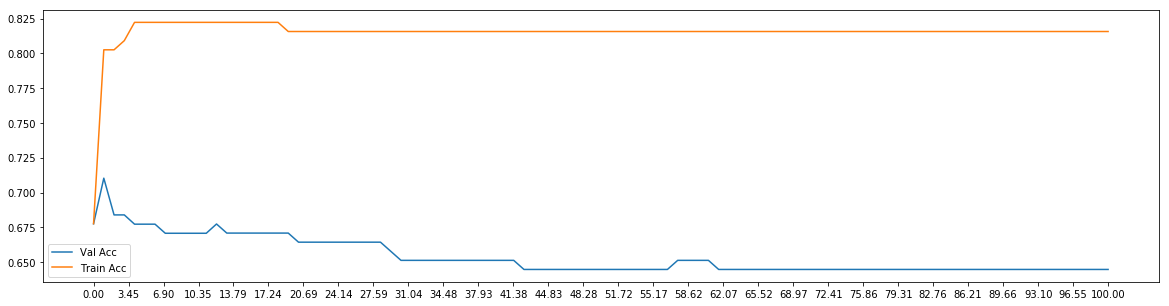

In [62]:
# try a smaller range with smaller intervals
# and use cross validation
from sklearn.model_selection import cross_val_score

train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=100, num=100)

for c in C_candidates:
    logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
    train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(20,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')
plt.xticks(np.linspace(start=0.001, stop=100, num=30))
plt.legend()
plt.show()

# looks like we want the region between 0.001 to 3

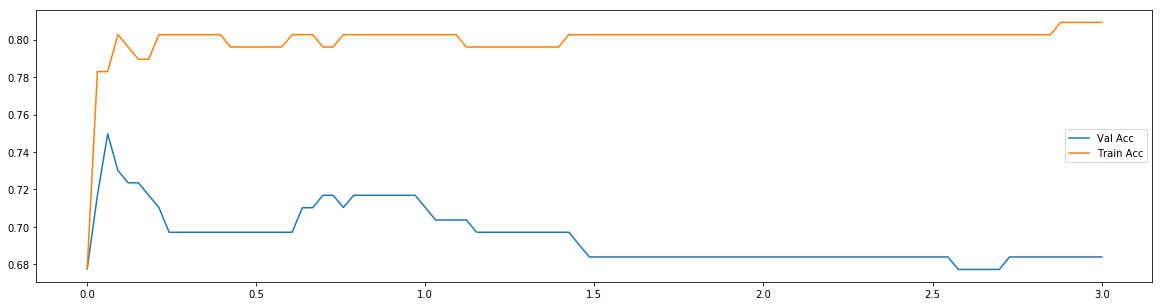

In [68]:
train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=3, num=100)

for c in C_candidates:
    logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
    train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(20,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

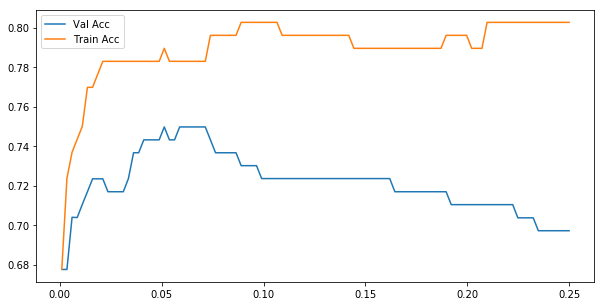

In [69]:
train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=0.25, num=100)

for c in C_candidates:
    logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
    train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(10,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

In [70]:
# best C value
optimal_C = C_candidates[np.argmax(mean_cross_val_acc)]
optimal_C

0.0513030303030303

### Logistic regression with optimal C

In [72]:
logit = LogisticRegression(C=optimal_C).fit(XtrainS, Ytrain['HasGarden'])
f"out of sample accuracy={logit.score(XtestS, Ytest['HasGarden'])}"

'out of sample accuracy=0.7435897435897436'

### Logistic Model with Sparse PCA (try with n=10 principle components)

In [286]:
from sklearn.decomposition import SparsePCA

In [288]:
# apply sparse PCA
spca = SparsePCA(XtrainS.shape[1]) # doing .shape[1] solved an error but I don't know why
XtrainP = spca.fit_transform(XtrainS)
XvalidateP = spca.transform(XvalidateS)
XtestP = spca.transform(XtestS)

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [289]:
print(XtrainP.shape)
print(XvalidateP.shape)
print(XtestP.shape)

(115, 37)
(38, 37)
(39, 37)


In [290]:
# Learn logistic regression over the first 5 principle components of sparse PCA training sample
logit_spca = LogisticRegression(C=10000)
logit_spca = logit_spca.fit(XtrainP[:,:10], Ytrain['HasGarden']) #fit logistic regression model to training data

In [291]:
# create binary garden predictions over test sample
labelPred_spca = logit_spca.predict(XtestP[:,:10])
print(labelPred_spca)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]


In [292]:
# compute out of sample accuracy
test_accuracy_spca= logit_spca.score(XtestP[:,:10],Ytest['HasGarden'])
test_accuracy_spca 

0.7435897435897436

### Select optimal number of principle components for classification

In [293]:
# select optimal number of principle components for the classification in terms of the out-of-sample accuracy measured over the validation sample
optimal_SPCA = np.zeros(shape=(37,2))
for n in range(1,37):
    #Learn logistic regression over the training sample
    logit_spca_opt = LogisticRegression(C=10000)
    logit_spca_opt = logit_spca_opt.fit(XtrainP[:,:n], Ytrain['HasGarden']) #fit logistic regression model to training data
    # compute out of sample accuracy over validation set
    validation_accuracy = logit_spca_opt.score(XvalidateP[:,:n],Yvalidate['HasGarden'])
    #print(n, validation_accuracy)
    optimal_SPCA[n,0] = n
    optimal_SPCA[n,1] = validation_accuracy

In [294]:
optimal_SPCA_df = pd.DataFrame(optimal_SPCA, index = optimal_SPCA[:,0])
optimal_SPCA_df.columns = ['n', 'accuracy']
optimal_SPCA_df.sort_values(by=['accuracy'], ascending = False).head(1)

,n,accuracy
12.0,12.0,0.684211


In [295]:
#Out of sample (test) accuracy for n = 6
logit_n6 = LogisticRegression(C=10000)
logit_n6 = logit_n6.fit(XtrainP[:,:7], Ytrain['HasGarden'])
out_of_sample_accuracy_test_n6= logit_n6.score(XtestP[:,:7],Ytest['HasGarden'])
out_of_sample_accuracy_test_n6
#The out of sample accuracy over the test set for 7 principal components is 74%

0.6923076923076923

### Logistic Model with  Lasso Regularization

In [296]:
logit_lasso = LogisticRegression(penalty='l1', C=10000) # lasso regression is penalty = l1; default is l2 which is ridge 
logit_lasso = logit_lasso.fit(XtrainS, Ytrain['HasGarden']) #fit logistic regression model to training data

In [297]:
# create binary garden predictions over test sample
labelPred_lasso = logit_lasso.predict(XtestS)
print(labelPred_lasso)

[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]


In [298]:
# calculate out of sample accuracy
test_accuracy_lasso = logit_lasso.score(XtestS,Ytest['HasGarden'])
test_accuracy_lasso

0.717948717948718